In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Update path if needed
file_path = r"C:\Users\divye\Downloads\data.csv"

df = pd.read_csv(file_path)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print("Dataset shape:", df.shape)
print("\nColumn info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic stats:")
df.describe()

Dataset shape: (4600, 18)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country     

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
# Drop irrelevant columns
df_clean = df.drop(columns=['date', 'street', 'city', 'statezip', 'country'])

# Handle yr_renovated: if 0 → use yr_built; else use yr_renovated
# CORRECTED LINE: Use .loc with a boolean mask
mask = df_clean['yr_renovated'] == 0
df_clean.loc[mask, 'yr_renovated'] = df_clean['yr_built']

# Optional: create 'age' and 'renovated' flag
df_clean['age'] = 2025 - df_clean['yr_built']
df_clean['is_renovated'] = (df_clean['yr_renovated'] != df_clean['yr_built']).astype(int)

# Final feature set (only numeric)
features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'age', 'is_renovated'
]

X = df_clean[features]
y = df_clean['price']

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (4600, 14)
Target shape: (4600,)


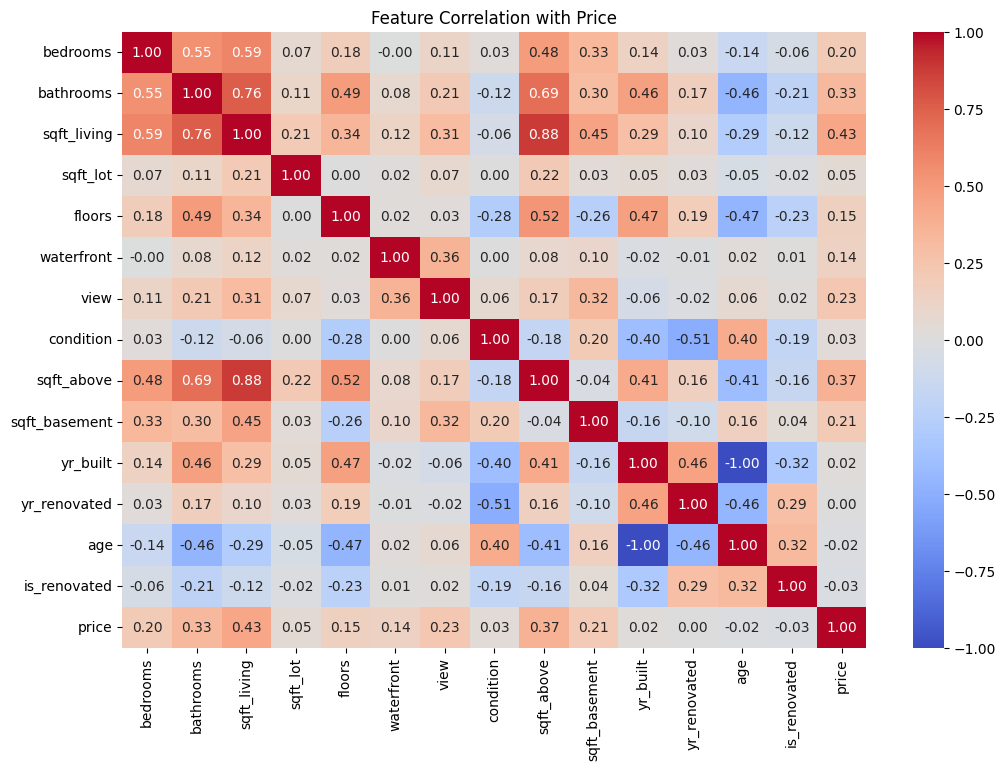

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[features + ['price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Price")
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (3680, 14)
Test size: (920, 14)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained!")
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_))

✅ Model trained!
Intercept: 1751829.4254928967
Number of coefficients: 14


In [9]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")
print(f"Test MAE: ${test_mae:,.2f}")
print(f"Test RMSE: ${np.sqrt(test_mse):,.2f}")

=== Model Performance ===
Train R²: 0.5445
Test R²:  0.0326
Test MAE: $210,700.49
Test RMSE: $993,265.24


In [10]:
import joblib

# Save model
joblib.dump(model, 'house_price_model.pkl')

# Save feature names (important for Streamlit input)
joblib.dump(features, 'model_features.pkl')

print("✅ Model and features saved!")

✅ Model and features saved!
